**Mean Squared Error (MSE):<br><br>**
J(θ) = (1/2m) * Σ(h(x) - y)²
where:
- h(x) = θ₀ + θ₁x (prediction)
- m = number of samples
- θ₀ = intercept, θ₁ = slope

**Gradient Descent Algorithm<br><br>**
Update Rule:<br>

- θ₀ = θ₀ - α * (1/m) * Σ(h(x) - y)
- θ₁ = θ₁ - α * (1/m) * Σ(h(x) - y) * x
- where α = learning rate

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, jarque_bera
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(2) # θ₀ ↔ c, θ₁ ↔ m
    cost_history = []
    
    for i in range(iterations):
        h = theta[0] + theta[1] * x
        
        grad_0 = (1/m) * np.sum(h - y)  # Gradient for intercept
        grad_1 = (1/m) * np.sum((h - y) * x)  # Gradient for slope
        
        # Update parameters
        theta[0] = theta[0] - learning_rate * grad_0
        theta[1] = theta[1] - learning_rate * grad_1
        
        # Calculate cost
        cost = (1/(2*m)) * np.sum((h - y)**2)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, Theta = {theta}")
    
    return theta, cost_history


np.random.seed(42)
X = np.random.rand(100) * 10
y = 2.5 * X + 1.5 + np.random.randn(100) * 2

theta, costs = gradient_descent(X, y, learning_rate=0.01, iterations=1000)

print(f"\nFinal parameters:")
print(f"Intercept (θ₀ ↔ c): {theta[0]:.2f}")
print(f"Slope (θ₁ ↔ m): {theta[1]:.2f}")

Iteration 0: Cost = 114.8282, Theta = [0.13252358 0.83408112]
Iteration 100: Cost = 1.8024, Theta = [0.77889916 2.58499716]
Iteration 200: Cost = 1.7217, Theta = [1.0580823  2.54208718]
Iteration 300: Cost = 1.6755, Theta = [1.26956485 2.50958267]
Iteration 400: Cost = 1.6489, Theta = [1.42976388 2.48496035]
Iteration 500: Cost = 1.6337, Theta = [1.55111541 2.46630883]
Iteration 600: Cost = 1.6249, Theta = [1.64303976 2.45218021]
Iteration 700: Cost = 1.6199, Theta = [1.7126729  2.44147772]
Iteration 800: Cost = 1.6170, Theta = [1.76542033 2.43337053]
Iteration 900: Cost = 1.6154, Theta = [1.80537675 2.42722929]

Final parameters:
Intercept (θ₀ ↔ c): 1.84
Slope (θ₁ ↔ m): 2.42


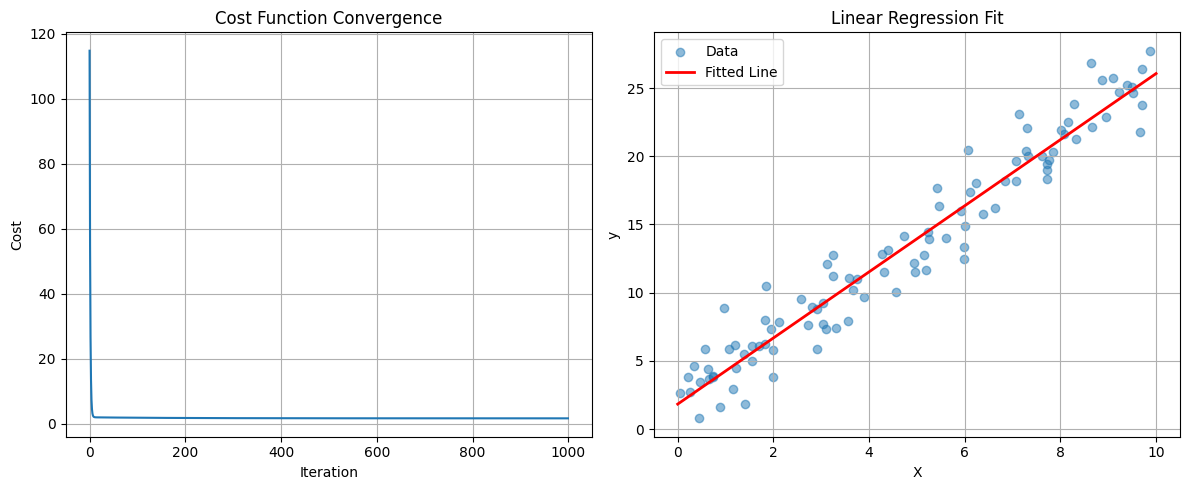

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.5, label='Data')
x_line = np.linspace(0, 10, 100)
y_line = theta[0] + theta[1] * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Learning Rate Selection**

Iteration 0: Cost = 114.8282, Theta = [0.01325236 0.08340811]
Iteration 100: Cost = 2.1089, Theta = [0.43235056 2.53256597]
Iteration 200: Cost = 1.9086, Theta = [0.48812226 2.62542396]
Iteration 300: Cost = 1.8923, Theta = [0.52816959 2.62336175]
Iteration 400: Cost = 1.8773, Theta = [0.5665484  2.61762816]
Iteration 500: Cost = 1.8630, Theta = [0.60385418 2.61190099]
Iteration 600: Cost = 1.8495, Theta = [0.64013846 2.60632443]
Iteration 700: Cost = 1.8368, Theta = [0.67543008 2.60090018]
Iteration 800: Cost = 1.8247, Theta = [0.70975624 2.5956243 ]
Iteration 900: Cost = 1.8133, Theta = [0.74314335 2.59049276]
Iteration 0: Cost = 114.8282, Theta = [0.13252358 0.83408112]
Iteration 100: Cost = 1.8024, Theta = [0.77889916 2.58499716]
Iteration 200: Cost = 1.7217, Theta = [1.0580823  2.54208718]
Iteration 300: Cost = 1.6755, Theta = [1.26956485 2.50958267]
Iteration 400: Cost = 1.6489, Theta = [1.42976388 2.48496035]
Iteration 500: Cost = 1.6337, Theta = [1.55111541 2.46630883]
Iteratio

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_14224\1222207826.py:17: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((h - y)**2)
C:\Users\User\AppData\Local\Temp\ipykernel_14224\1222207826.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  theta[1] = theta[1] - learning_rate * grad_1


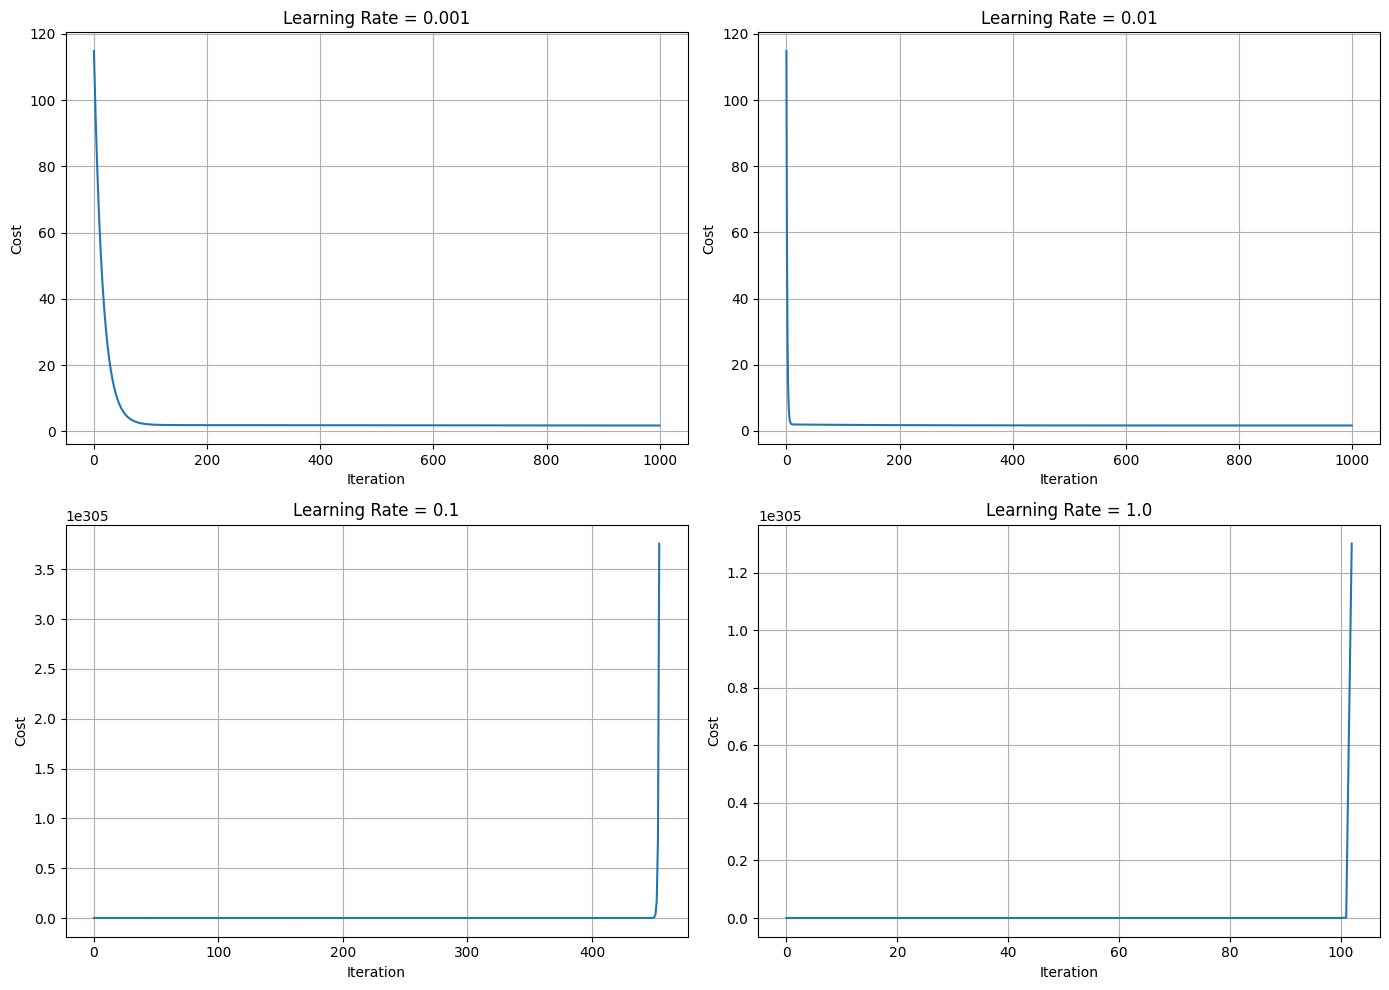

In [5]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, lr in enumerate(learning_rates):
    theta, costs = gradient_descent(X, y, learning_rate=lr, iterations=1000)
    axes[idx//2, idx%2].plot(costs)
    axes[idx//2, idx%2].set_title(f'Learning Rate = {lr}')
    axes[idx//2, idx%2].set_xlabel('Iteration')
    axes[idx//2, idx%2].set_ylabel('Cost')
    axes[idx//2, idx%2].grid(True)

plt.tight_layout()
plt.show()

##### Residual Analysis
- Residuals = Actual - Predicted = y - ŷ

In [6]:
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # 1. Residuals vs Predicted
    axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Predicted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Predicted')
    axes[0, 0].grid(True)
    
    # 2. Q-Q Plot (Normality check)
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot (Normality Check)')
    axes[0, 1].grid(True)
    
    # 3. Histogram of Residuals
    axes[1, 0].hist(residuals, bins=30, edgecolor='black')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Residuals')
    axes[1, 0].grid(True)
    
    # 4. Scale-Location Plot (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    axes[1, 1].scatter(y_pred, np.sqrt(np.abs(standardized_residuals)), alpha=0.5)
    axes[1, 1].set_xlabel('Predicted Values')
    axes[1, 1].set_ylabel('√|Standardized Residuals|')
    axes[1, 1].set_title('Scale-Location Plot')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Normality test
    stat, p_value = shapiro(residuals[:5000])
    print(f"Shapiro-Wilk Test: p-value = {p_value:.4f}")
    if p_value > 0.05:
        print("Residuals appear normally distributed")
    else:
        print("Residuals may not be normally distributed")
        
    print(f"\nResidual Statistics:")
    print(f"  Mean: {residuals.mean():.6f} (should be ~0)")
    print(f"  Std:  {residuals.std():.2f}")
    print(f"  Min:  {residuals.min():.2f}")
    print(f"  Max:  {residuals.max():.2f}")

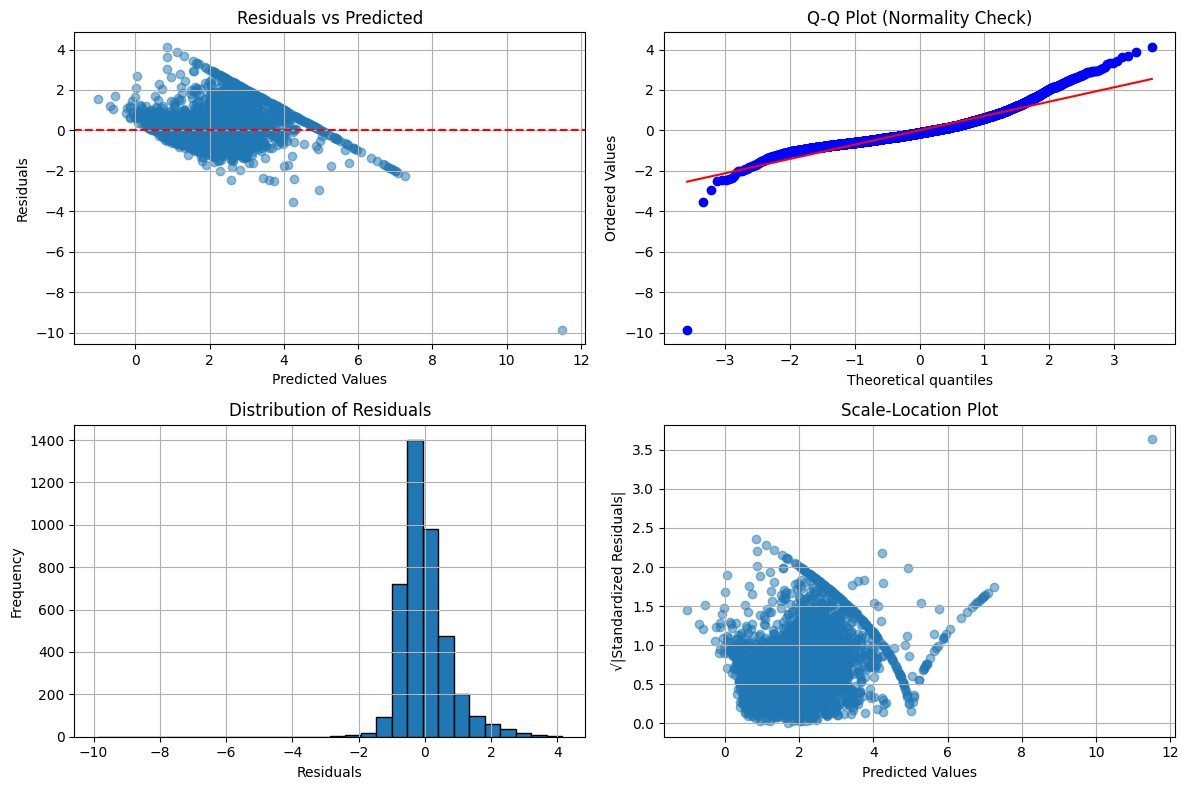

Shapiro-Wilk Test: p-value = 0.0000
Residuals may not be normally distributed

Residual Statistics:
  Mean: 0.003479 (should be ~0)
  Std:  0.75
  Min:  -9.88
  Max:  4.15


In [7]:
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plot_residuals(y_test, y_pred)

#### Handling Outliers

**Detecting Outliers (Z-Score)**

In [12]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = z_scores > threshold
    return outliers

outliers = detect_outliers_zscore(y)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


**IQR**

In [10]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

outliers = detect_outliers_iqr(y)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 1071


**Residuals**

In [11]:
residuals = y_test - y_pred
residuals_std = residuals.std()
outliers = np.abs(residuals) > 3 * residuals_std

print(f"Outliers based on residuals: {outliers.sum()}")

Outliers based on residuals: 70


**Remove Outliers**

In [13]:
X_clean = X[~outliers]
y_clean = y[~outliers]

model_clean = LinearRegression()
model_clean.fit(X_clean, y_clean)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Transform Target Variable**

In [15]:
# Log transformation (for right-skewed data)
y_log = np.log1p(y_train)

model_log = LinearRegression()
model_log.fit(X_train_scaled, y_log)
y_pred_log = model_log.predict(X_test_scaled)

# Transform back
y_pred = np.expm1(y_pred_log)

**Robust Regression**

In [17]:
robust_model = HuberRegressor(epsilon=1.35)
robust_model.fit(X_train_scaled, y_train)
y_pred_robust = robust_model.predict(X_test_scaled)

# Compare
print(f"Standard Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Robust Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_robust)):.2f}")

Standard Linear Regression RMSE: 0.98
Robust Regression RMSE: 0.76
